# ESCI 445 Exercise 6 - Relaxation

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Read Data

In [2]:
filename = "exercise-6-vorticity-input.dat"

vort = np.loadtxt(filename, dtype = np.float_)
vort = np.transpose(vort)  # transposes to get orientation correct

### Set Up Parameters

In [3]:
d = 2e5  # Grid spacing in meters
epsilon = 1e-8  # Tolerance

nx, ny = np.shape(vort)  # Calculates shape of array

### Create and Initialize Guess Field and Array of Residuals

In [4]:
G = np.zeros_like(vort)  # Array for guess field

# Guess field for Part II.  Just uncomment
for j in range(0,ny):
    G[:,j] = -8.74e6*j + 6.55e8

R = np.zeros_like(vort)  # Array for residuals

### <font color = 'blue'><i>*Perform relaxation (will need 'while loop', with double-nested grid loops.)

In [5]:
# Ensures one residual out of tolerance so that while loop will execute
R[int(nx/2), int(ny/2)] = 9999.9

# Calculate over-relaxation coefficient
t = np.cos(np.pi/nx) + np.cos(np.pi/ny)
alpha = (8 - 4 * np.sqrt(4-t**2)) / t**2

# Loop for relaxation
count = 0
while (np.max(np.abs(R))) >= epsilon:
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            R[i,j] = (G[i-1,j] + G[i+1,j] + G[i,j-1] + G[i,j+1] - 4*G[i,j]) / d**2 - vort[i,j]
            G[i,j] = G[i,j] + alpha*(d**2/4) * R[i,j]
                
    count +=1
    print(count,np.max(np.abs(R)))

1 0.00053895581026
2 0.000499413021753
3 0.000473424906208
4 0.0004520166777
5 0.000432984129189
6 0.000464747184816
7 0.00048365254861
8 0.000483670965637
9 0.00046793824627
10 0.000440291612095
11 0.000403903945013
12 0.000363621717867
13 0.000336864523642
14 0.000308547762511
15 0.000276492161513
16 0.000243689293819
17 0.000223743189846
18 0.000206426452108
19 0.000192958970909
20 0.000186554031077
21 0.000179821720147
22 0.000173639069736
23 0.000167933027029
24 0.000161892612573
25 0.000156190904214
26 0.000150420532433
27 0.000144516795312
28 0.000138256322039
29 0.000131804307836
30 0.000125045510135
31 0.00011832298698
32 0.000111308357579
33 0.000104383215257
34 9.77281378615e-05
35 9.09121906177e-05
36 8.40151419833e-05
37 7.76953741626e-05
38 7.14323927088e-05
39 6.53064853053e-05
40 5.93887941011e-05
41 5.40372268014e-05
42 4.89571767128e-05
43 4.41594980275e-05
44 4.249790895e-05
45 4.14062901329e-05
46 4.02693080365e-05
47 3.91862879069e-05
48 3.79505036567e-05
49 3.6772

### Create Plot

<IPython.core.display.Javascript object>


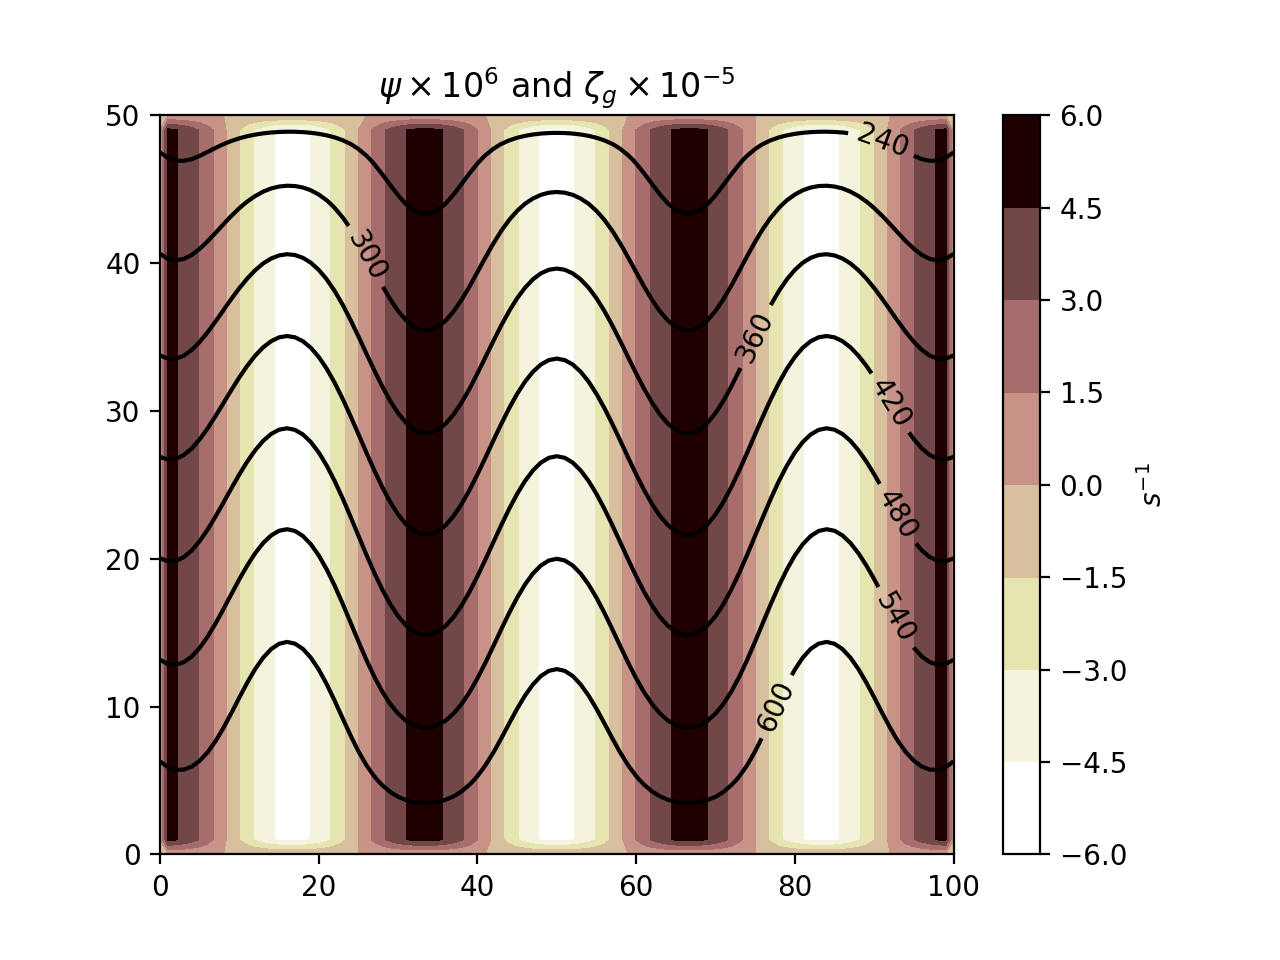

In [6]:
%matplotlib notebook

#Create scaled and transposed arrays for plotting
zeta, psi = np.transpose(vort)*1e5, np.transpose(G)*1e-6

fig = plt.figure()
ax = fig.add_subplot(111)

pc = ax.contourf(zeta,vmin = np.min(zeta), vmax = np.max(zeta),
                 cmap = cm.get_cmap('pink_r'))
ax.set_xlim(0,nx-1)
ax.set_ylim(0,ny-1)
cb = plt.colorbar(pc,ax = ax)
cb.set_label(r'$s^{-1}$')
cs = ax.contour(psi, colors = 'black')
plt.clabel(cs, fmt = '%.0f', inline = True)
ax.set_title(r'$\psi\times 10^{6}$ and $\zeta_g\times 10^{-5}$')

plt.show()